In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
df = yf.download('TSLA', start='2015-01-01', end='2025-01-01')
historical = df['Close'].asfreq('B').fillna(method='ffill')


C:\Users\HP\AppData\Local\Temp\ipykernel_12592\1856385755.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('TSLA', start='2015-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


In [8]:
from statsmodels.tsa.arima.model import ARIMA

train = historical[:'2023-12-31']

model_arima = ARIMA(train, order=(2,1,2))
model_arima_fit = model_arima.fit()


In [9]:
n_steps = 126
forecast_result = model_arima_fit.get_forecast(steps=n_steps)
forecast_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()


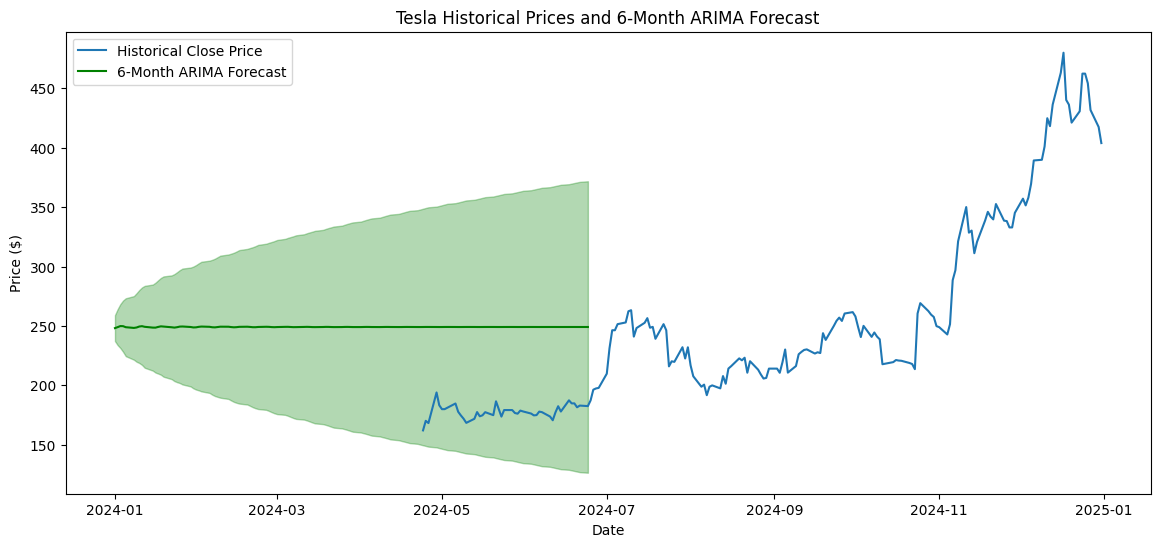

In [10]:
plt.figure(figsize=(14,6))
plt.plot(historical[-180:], label='Historical Close Price')
plt.plot(forecast_mean.index, forecast_mean, label='6-Month ARIMA Forecast', color='green')
plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='green', alpha=0.3)
plt.title('Tesla Historical Prices and 6-Month ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


In [11]:
trend = "upward" if forecast_mean[-1] > forecast_mean[0] else "downward"
conf_width = conf_int.iloc[:,1] - conf_int.iloc[:,0]
conf_width_change = conf_width.iloc[-1] - conf_width.iloc[0]


In [12]:
print(f"Trend Analysis: The forecast shows a {trend} trend over the next 6 months.")
print(f"Confidence Interval Width Increase: {conf_width_change:.2f}")
print("The widening confidence intervals indicate increasing uncertainty as the forecast horizon extends.")
print("Market Opportunities: Potential gains if the upward trend continues.")
print("Risks: Increased volatility and uncertainty suggest caution in long-term investment decisions.")


Trend Analysis: The forecast shows a upward trend over the next 6 months.
Confidence Interval Width Increase: 223.35
The widening confidence intervals indicate increasing uncertainty as the forecast horizon extends.
Market Opportunities: Potential gains if the upward trend continues.
Risks: Increased volatility and uncertainty suggest caution in long-term investment decisions.
